In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2, json, torch, os, re

import util, constants, draw, cam, model, parse_alphapose, img_proc

np.random.seed(0)
torch.manual_seed(0)

VID_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden/'
DATA_ROOT = '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/'

img_shape_yx = plt.imread(VID_ROOT+'/all_views/frame_00001.png').shape[:2];img_shape_xy = img_shape_yx[::-1]

uf_mat_int_default = cam.get_intrinsic_mat_default()
uf_mat_int = cam.get_intrinsic_mat_for_img_shape(img_shape_xy)

print(f'img_shape_xy: {img_shape_xy}')

img_shape_xy: (1280, 720)


In [2]:
view_dirs = []
for d in os.listdir(VID_ROOT):
    if re.match('view_[0-9]$', d) is not None:
        view_dirs.append(f'{VID_ROOT}/{d}')
print(view_dirs)
imgs = []
for view_dir in view_dirs:
    files = os.listdir(view_dir);files.sort()
    imgs_view = []
    for file in files[::10]:
        imgs_view.append(plt.imread(f'{view_dir}/{file}'))
    imgs.append(imgs_view)
imgs = np.array(imgs)
print(imgs.shape)

['/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden//view_0', '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden//view_1', '/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/harden//view_2']
(3, 9, 720, 1280, 3)


In [3]:
import parse_alphapose
kp, confs, scores, boxes = parse_alphapose.parse_alphapose('/home/akarshkumar0101/nba-3d-data/harden/', 90)

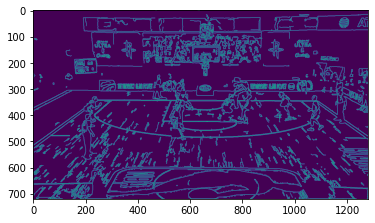

In [4]:
img = img_proc.to_uint8(imgs[2, 0].copy())
plt.imshow(cv2.Canny(img, 50, 150, apertureSize=3))

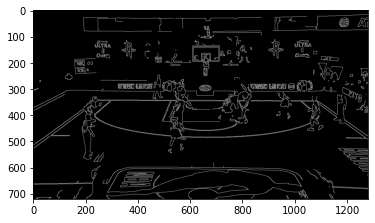

In [12]:
canny = img_proc.process_img_canny(imgs[2, 0])
plt.imshow(canny, cmap='gray')
plt.show()

In [25]:
Y, X = np.where(canny>128)

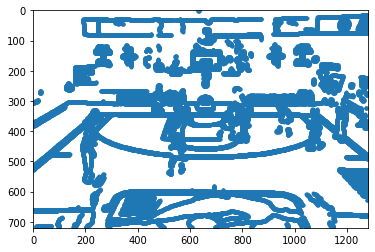

In [31]:
plt.scatter(X, Y, marker='.')
draw.set_img_bounds(img_shape_xy)

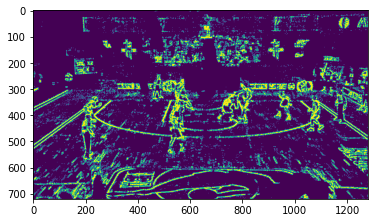

In [17]:


img = imgs[2, 0].copy()
img = img_proc.process_img(img)
# img = draw.draw_people2D(img, kp[0][0], color=255, thickness=1)
img = img_proc.erase_players(img, kp[1][0])
plt.imshow(img)

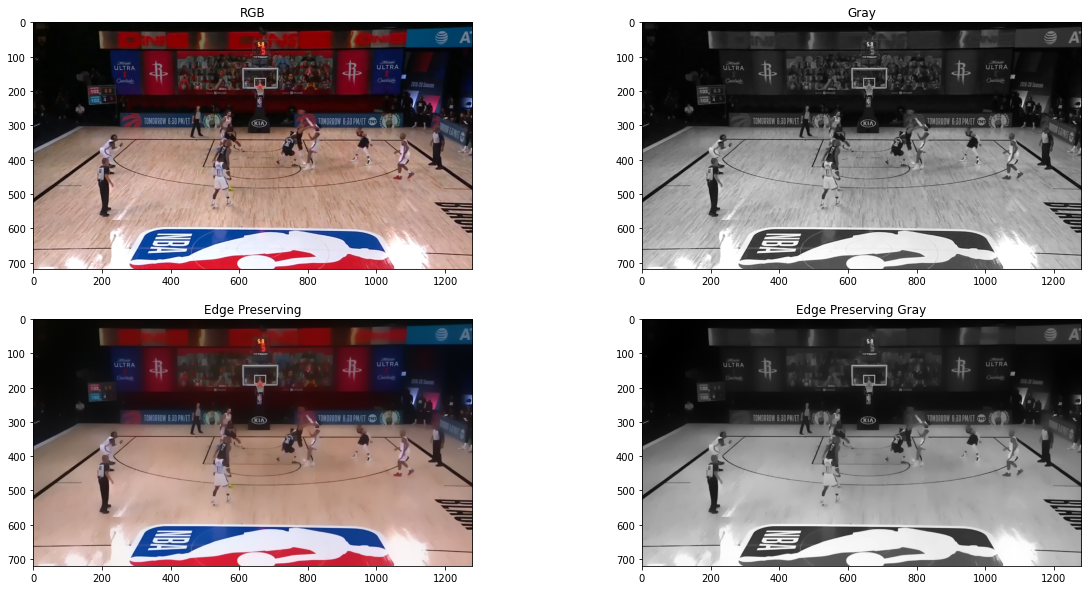

In [5]:
img = imgs[2][0]
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
grayu = cv2.normalize(gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# plt.imshow(cv2.bilateralFilter(grayu, 7, 50, 50), cmap='gray')
img_ep = cv2.edgePreservingFilter(img_proc.to_uint8(img))
gray_ep = cv2.cvtColor(img_ep, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(221);plt.imshow(img);plt.title('RGB')
plt.subplot(222);plt.imshow(gray, cmap='gray');plt.title('Gray')
plt.subplot(223);plt.imshow(img_ep);plt.title('Edge Preserving')
plt.subplot(224);plt.imshow(gray_ep, cmap='gray');plt.title('Edge Preserving Gray')
plt.show()

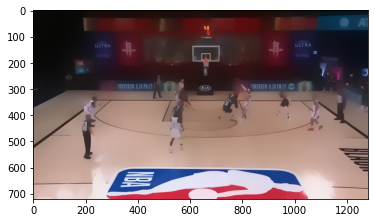

In [7]:
plt.imshow(cv2.edgePreservingFilter(img_ep))

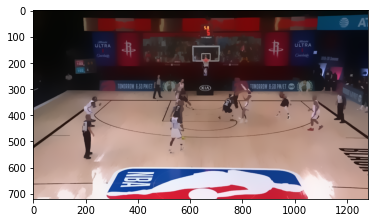

In [8]:
plt.imshow(cv2.bilateralFilter(img_ep, 0, 20, 20))

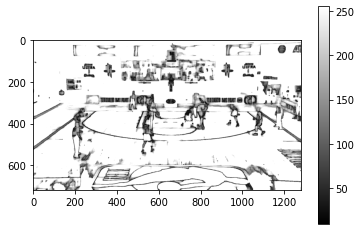

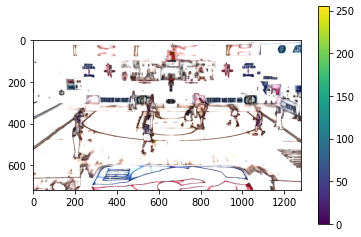

In [9]:
plt.imshow(cv2.pencilSketch(img_ep)[0], cmap='gray');plt.colorbar()
plt.show()
plt.imshow(cv2.pencilSketch(img_ep)[1]);plt.colorbar()
plt.show()

In [18]:
img = imgs[2, 0].copy()

In [22]:
img = img_proc.to_uint8(img)

In [24]:
img.dtype

dtype('uint8')

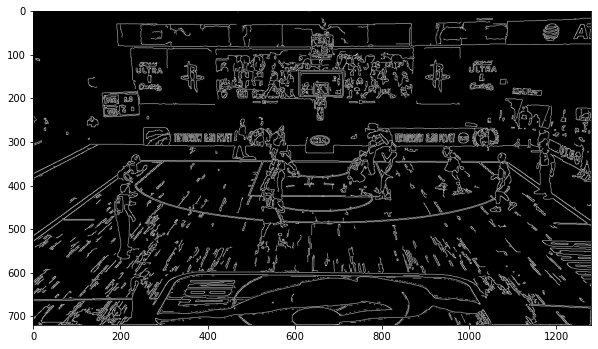

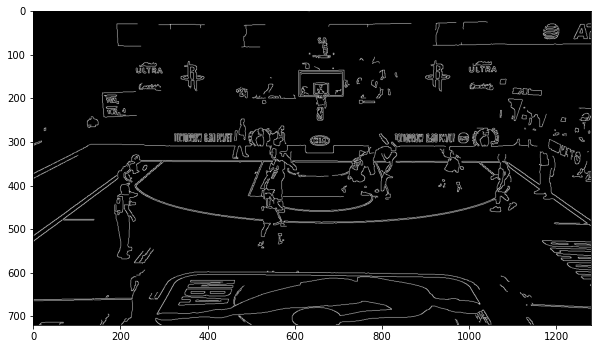

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.Canny(img, 50,150, apertureSize = 3), cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2.Canny(gray_ep, 50,150, apertureSize = 3), cmap='gray')
plt.show()

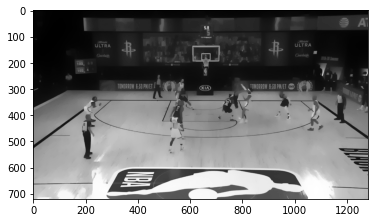

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0. -40.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]]


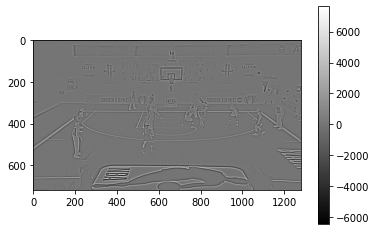

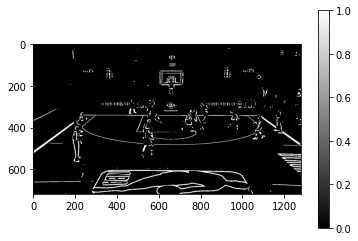

In [64]:
plt.imshow(gray_ep, cmap='gray')
plt.show()

N = 11
kernel = np.zeros((N, N), dtype=np.float32)
kernel[N//2, N//2] = -(4*N-4)
kernel[[0, N-1], :] = 1;kernel[:, [0, N-1]] = 1
print(kernel)

plt.imshow(cv2.filter2D(gray_ep, cv2.CV_32F, kernel), cmap='gray');plt.colorbar()
plt.show()
plt.imshow(cv2.filter2D(gray_ep, cv2.CV_32F, kernel)>1000, cmap='gray');plt.colorbar()



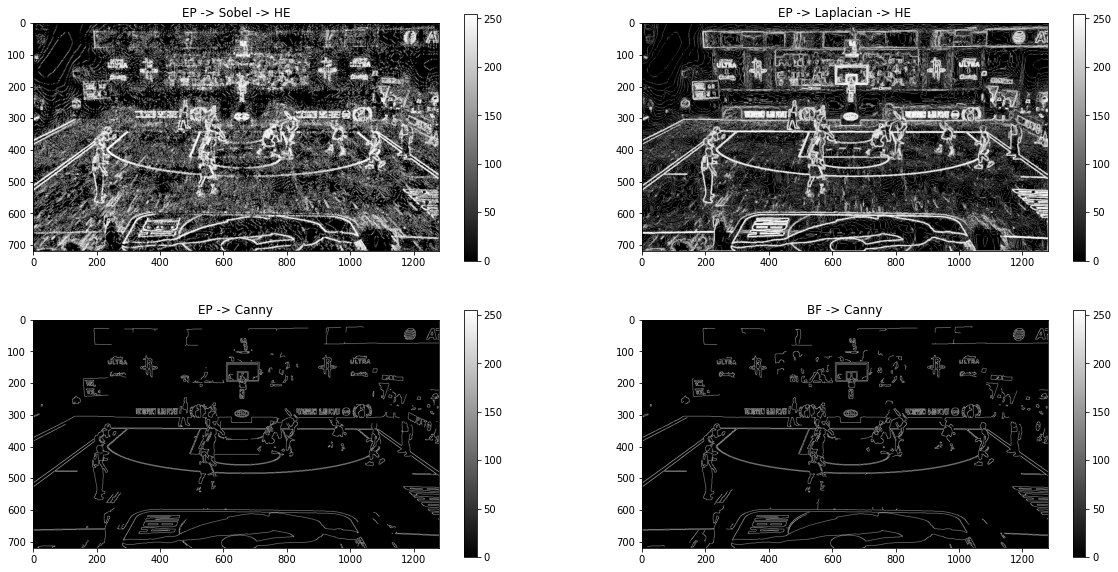

In [8]:
sobel = cv2.Sobel(gray_ep, cv2.CV_32F, 1, 1, ksize=3)
sobel = cv2.equalizeHist(img_proc.to_uint8(np.abs(sobel)))
laplacian = cv2.Laplacian(gray_ep, cv2.CV_32F, ksize=3)
laplacian = cv2.equalizeHist(img_proc.to_uint8(np.abs(laplacian)))
canny = cv2.Canny(gray_ep, 50,150, apertureSize = 3)
cannybf = cv2.Canny(cv2.bilateralFilter(grayu, 7, 50, 50), 50,150, apertureSize = 3)

plt.figure(figsize=(20, 10))
plt.subplot(221);plt.imshow(sobel, cmap='gray');plt.colorbar();plt.title('EP -> Sobel -> HE')
plt.subplot(222);plt.imshow(laplacian, cmap='gray');plt.colorbar();plt.title('EP -> Laplacian -> HE')
plt.subplot(223);plt.imshow(canny, cmap='gray');plt.colorbar();plt.title('EP -> Canny')
plt.subplot(224);plt.imshow(cannybf, cmap='gray');plt.colorbar();plt.title('BF -> Canny')
plt.show()


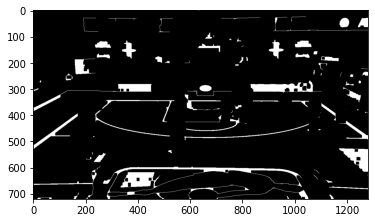

In [11]:
img = canny.copy()

img = img_proc.erase_players(canny, kp[2][0], width=25)

# img[score_box[0][0][1]: score_box[0][1][1], score_box[0][0][0]: score_box[0][1][0]] = 0

img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((10,10), dtype=np.uint8))
plt.imshow(img, cmap='gray')

In [12]:
with open(VID_ROOT+'/score_box_loc.json') as f:
    score_box = json.load(f)
score_box

[[[254, 585], [1026, 693]], [], []]

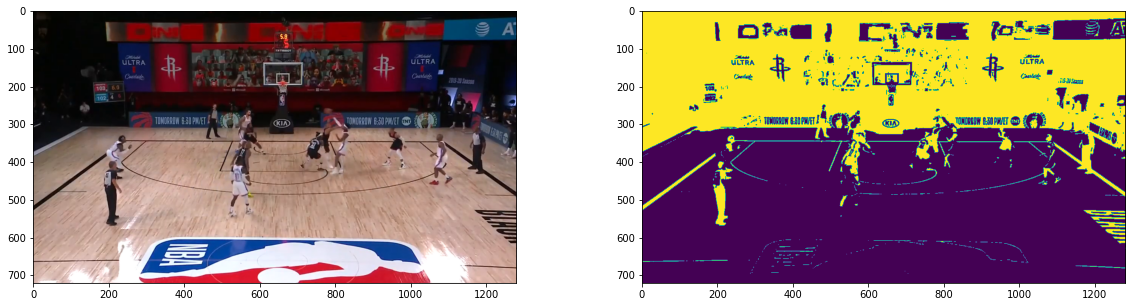

In [29]:
img = img_proc.to_uint8(imgs[2][0])


newimg = np.linalg.norm(img-np.array([32, 16, 11]), axis=-1)<100

plt.figure(figsize=(20,5))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(newimg)
plt.show()

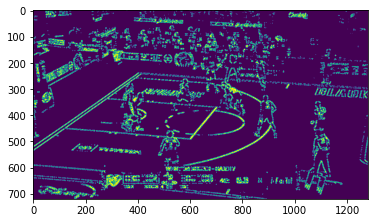

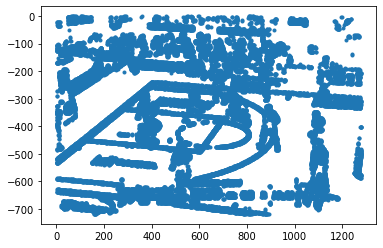

In [63]:
y, x = np.where(sobel>150)
plt.imshow(sobel>150);plt.show()
plt.scatter(x[::2],-y[::2], marker='.');plt.show()

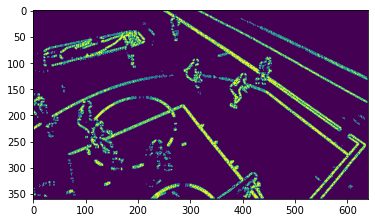

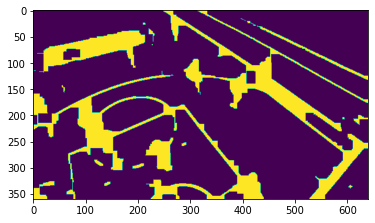

In [38]:
sobel_binary = sobel>150
plt.imshow(sobel_binary);plt.show()
sobel_binary = sobel_binary.astype(np.uint8)*255
sobel_binary = cv2.morphologyEx(sobel_binary, cv2.MORPH_CLOSE, np.ones((15, 15),np.uint8))
plt.imshow(sobel_binary);plt.show()

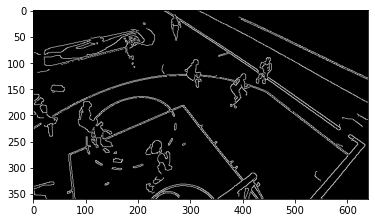

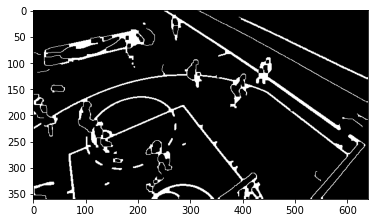

In [135]:
plt.imshow(canny, cmap='gray')
plt.show()
kernel = np.ones((5, 5),np.uint8)
closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap='gray')
plt.show()

(array([112418.,      0.,      0.,      0.,      0.,  59778.,  20839.,
         13202.,  12219.,  11944.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

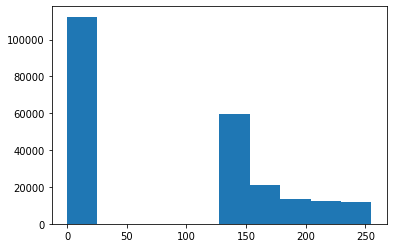

In [98]:
plt.hist(laplacian.flatten())

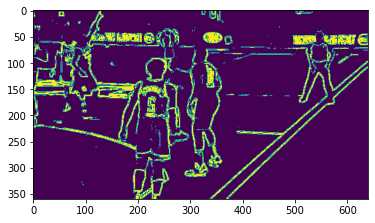

In [101]:
plt.imshow(laplacian>200)

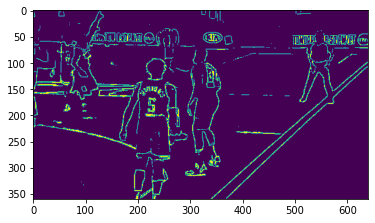

In [104]:
plt.imshow(np.logical_and(f>100, laplacian>200))

24
1


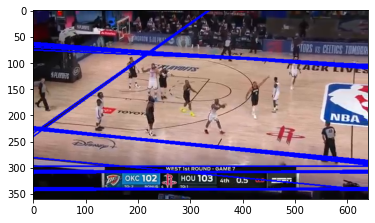

In [38]:
newimg = img.copy()

lines = cv2.HoughLines(canny,1,np.pi/360.,200)
print(len(lines))
print(len(lines[0]))
for lines_row in lines:
    for rho,theta in lines_row:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(newimg,(x1,y1),(x2,y2),(0, 0, 1.), 2)
plt.imshow(newimg)
plt.show()

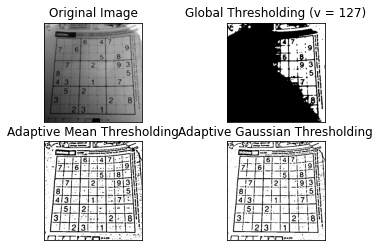

In [109]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/akarshkumar0101/Insync/akarshkumar0101@gmail.com/Google Drive/nba-3d-data/dave.jpg', 0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [121]:
f = cv2.adaptiveThreshold(gray_ep,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,51,2)

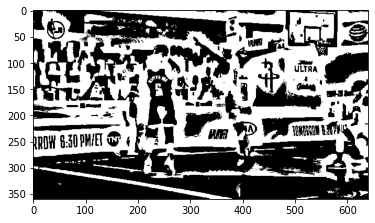

In [122]:
plt.imshow(f, cmap='gray')

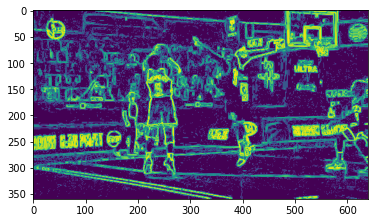

In [123]:
plt.imshow(laplacian)

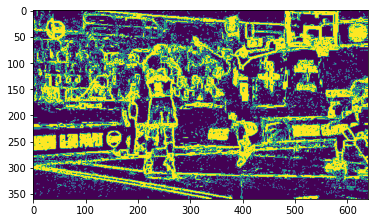

In [132]:
f = cv2.adaptiveThreshold(laplacian,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,201,2)
plt.imshow(f)

In [8]:
img.shape

(360, 640, 3)

In [21]:
ridge_filter = cv2.ximgproc.RidgeDetectionFilter_create()
ridges = ridge_filter.getRidgeFilteredImage(img)
ridges = ridges/ridges.max()*255

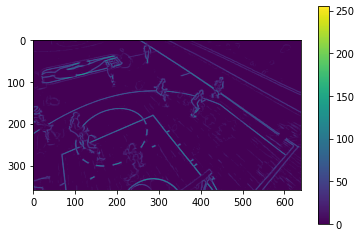

In [22]:
plt.imshow(ridges);plt.colorbar()

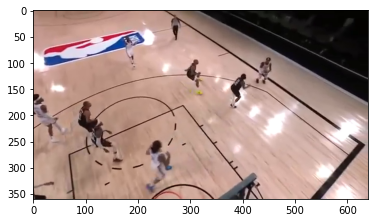

In [23]:
plt.imshow(img)